<br>
<br>
<br>

# <center> "It's not the destination, it's the journey."</center>

## A study on the statistics and data about reported accidents and casualties on public roads in Great Britain.
<br>

### <center>*Students:*</center>
<center>Davide Libera (990993)</center>
<center>Damiano Masuino (886922)</center>
<center>Gianluca Mongiu (992047)</center>
<br>

***
 
### Index of this Notebook.
This *Jupyter Notebook* can be divide in 3 main parts. The first one is a **general look on the data we have**; it contains several graphs and plot with some interesting observationts.
The second part is a **specific study on some famous road junctions in UK**.
The last one contains some **predictive methods**, that we have implemented with the aim of predicting the severity of an accident from some available data.
1. **Prepare the car for the journey.**
2. **A look at the data.**
3. **Junction fever.**
4. **What will happend tomorrow?.**

***

### Data source.
All information and statistics, all accident numbers and specifics that were used in this study come from the **official UK Open Data website** (https://data.gov.uk); in particular, the used datasets are collected and uploaded periodically by the UK Department of Transport (https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data).
<br>
<br>
<br>

***

## Chapter 1
### Prepare the car for the journey.
*A well-organized trip can only begin with the preparation of the suitcases, the car and above all with a check: you must have everything you need.*
<br>

We have organized in the next cell all the external libraries needed for this notebook. Please install them by removing the "#" if there are not already installed in your computer.

In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install statistics
# !pip install numpy

***
## Chapter 2
### A look at the data.
<br>

Our first analyzes were made on the datasets containing information on accidents that occurred in the last 5 years. The first thing to do is therefore to create datasets with all the information taken directly from the *.csv* format files found online.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import numpy as np

from IPython.core.display import HTML

In [3]:
url_acc_lst5 = "https://data.dft.gov.uk/road-accidents-safety\
-data/dft-road-casualty-statistics-accident-last-5-years.csv"
url_cas_lst5 = "https://data.dft.gov.uk/road-accidents-safety\
-data/dft-road-casualty-statistics-casualty-last-5-years.csv"
url_vei_lst5 = "https://data.dft.gov.uk/road-accidents-safety\
-data/dft-road-casualty-statistics-vehicle-last-5-years.csv"

df_acc_lst5 = pd.read_csv(url_acc_lst5,low_memory=False)
df_cas_lst5 = pd.read_csv(url_cas_lst5,low_memory=False)
df_vei_lst5 = pd.read_csv(url_vei_lst5,low_memory=False)

There are 3 datasets for each period of time: the main one is the "Accident dataset"; then there are two more containing all the people and the vehicles involved in each accident (the "Casualties dataset" and the "Vehicle dataset" respectively).

In [4]:
print(df_acc_lst5.keys(),df_cas_lst5.keys(),df_vei_lst5.keys())

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object') Index(['accident_index', 'accident_year', 'accident_reference',
       've

With an idea about all the keys of these datasets, we can now create small ones that give us the possibility to study them in an easier way.

In [5]:
df_acc_lst5sm = df_acc_lst5[['number_of_casualties','speed_limit','number_of_vehicles','road_type',\
                           'accident_severity','weather_conditions','junction_detail']]
df_vei_lst5sm = df_vei_lst5[['vehicle_type','vehicle_manoeuvre','age_of_driver','sex_of_driver']]
df_cas_lst5sm = df_cas_lst5[['pedestrian_location','pedestrian_movement','car_passenger','casualty_class',\
                           'casualty_severity','age_of_casualty']]
df_acc_lst5sm_fatal = df_acc_lst5sm[df_acc_lst5sm['accident_severity']==1]
df_cas_lst5sm_fatal = df_cas_lst5sm[df_cas_lst5sm['casualty_severity']==1]

The **general analysis** is about histograms and statistics on the variables from the dataset, specifically:
1. age of the driver (both about all casualties and about deaths only).
2. number of vehicles and casualties per accident.
3. accident severity.
4. manouvres.
5. kinds of vehicles involved.
6. pedestrians.
7. speed limits.
8. weather conditions.

*we do not analyze anything about junctions and road paths because there is a chapter on that*
<br>

In all three datasets, the **missing values** can be described by two ways: they can be *"NaN" entities* or they can take the value *-1* (it depends on the variable, all the information about how they are described is collected in the guide downloadable from the link in the first cell of this notebook).
<br>

As we sad before, an initial analysis can be made on the **age of the people involved** in accidents, with a particular focus on deaths.
<br>

The variable "age_of_driver" has "-1" as value that indicates missing values so the first thing that we have to do is delete the rows where that variable is missing (the dataset is huge so we don't need to replace the missing value with some substitute such as mode or the median of the other values).
To be sure of this, it is good to check that the dataset has more or less the same size as it had before the removal of the missing values.

In [6]:
age_of_driver = df_vei_lst5sm['age_of_driver'].values.tolist()
len_before = len(age_of_driver)
age_of_driverMV = age_of_driver.count(-1)
age_of_driver = [x for x in age_of_driver if x != -1]
print('After the cleaning of the MV, the array is the',100*(len(age_of_driver)/len_before), \
      '% of the original array')

After the cleaning of the MV, the array is the 87.35392718350096 % of the original array


In [7]:
age_of_driver_fatal = df_cas_lst5sm_fatal['age_of_casualty'].values.tolist()
age_of_driverMV = age_of_driver.count(-1)
len_before = len(age_of_driver_fatal)
age_of_driver_fatal = [x for x in age_of_driver_fatal if x != -1]
print('After the cleaning of the MV, the array is the',100*(len(age_of_driver_fatal)/len_before), \
      '% of the original array')

After the cleaning of the MV, the array is the 99.98834634657965 % of the original array


It's now finally time to plot some data...

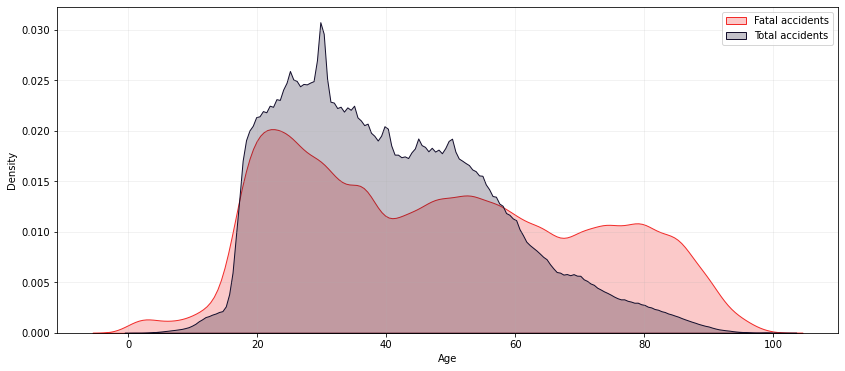

In [8]:
plt.figure(figsize=(14,6))
fig=sns.kdeplot(age_of_driver_fatal,color='#f22b29',shade=True, bw_adjust=.5,label='Fatal accidents')
fig=sns.kdeplot(age_of_driver,color='#140f2d',shade=True,bw_adjust=.5,label='Total accidents')
plt.legend()
plt.xlabel("Age")
plt.ylabel("Density")
plt.grid(alpha=0.2)
plt.show()
HTML("""<style>.output_png{display: table-cell;text-align: center;vertical-align: middle;}</style>""")

The plots and graphs are very nice to look at, but all the statistics are interesting too! We have created a function that, given a variable, it calculates the mean, the mode, the median, the standard deviation and the variance of it.

In [9]:
def statistics(variable):
    stats={}
    stats['mean']=stat.mean(variable)
    stats['mode']=stat.mode(variable)
    stats['median']=stat.median(variable)
    stats['std_dev']=stat.stdev(variable)
    stats['variance']=stat.variance(variable)
    return stats

In [10]:
print(statistics(age_of_driver))
print(statistics(age_of_driver_fatal))

{'mean': 40.53983391580232, 'mode': 30, 'median': 38, 'std_dev': 16.37182076416926, 'variance': 268.0365151340838}
{'mean': 47.68531468531469, 'mode': 21, 'median': 46.0, 'std_dev': 22.520525534803124, 'variance': 507.1740703637195}


Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed egestas erat ac ante luctus, in porta elit auctor. Phasellus diam enim, ullamcorper dignissim metus eu, molestie vehicula tellus. Mauris faucibus a dui quis laoreet. Praesent et orci quis leo mollis ornare nec vel ante. Integer porttitor et sem nec ultrices. Quisque eleifend pellentesque magna, in lobortis nunc tempor gravida. Sed ac libero eu sapien pretium finibus sit amet at erat. Nunc auctor eget est vel cursus. In at sodales turpis.

The next variable that we study (with both an histogram and the "statistics function" created) is the **number of casualties** per accident and the **number of vehicles** involved in each crash.

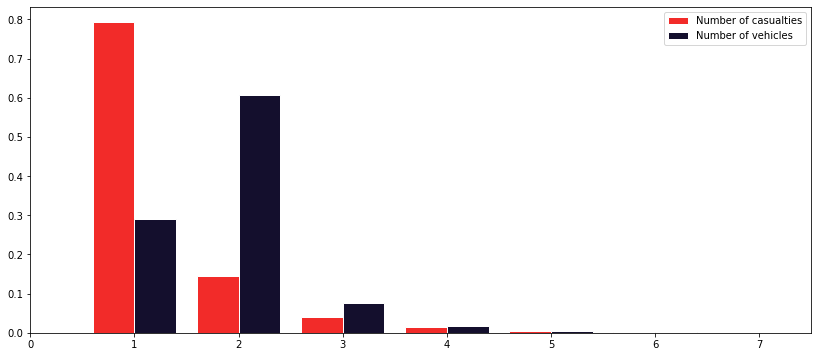

{'mean': 1.8422085947024365, 'mode': 2, 'median': 2, 'std_dev': 0.7099327586979698, 'variance': 0.5040045218725098}
{'mean': 1.3072764154903316, 'mode': 1, 'median': 1, 'std_dev': 0.7564937752241814, 'variance': 0.5722828319529343}


In [11]:
plt.figure(figsize=(14,6))
number_of_casualties = df_acc_lst5sm['number_of_casualties'].values.tolist()
number_of_vehicles = df_acc_lst5sm['number_of_vehicles'].values.tolist()
#both of them have none MVs

plt.hist([number_of_casualties,number_of_vehicles],bins=np.arange(100)-0.5,\
         label=('Number of casualties','Number of vehicles'),color=['#f22b29','#140f2d'],edgecolor='white',\
         density=True)
plt.xlim(0,7.5)
plt.legend()
plt.show()
HTML("""<style>.output_png{display: table-cell;text-align: center;vertical-align: middle;}</style>""")

print(statistics(number_of_vehicles))
print(statistics(number_of_casualties))

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed egestas erat ac ante luctus, in porta elit auctor. Phasellus diam enim, ullamcorper dignissim metus eu, molestie vehicula tellus. Mauris faucibus a dui quis laoreet. Praesent et orci quis leo mollis ornare nec vel ante. Integer porttitor et sem nec ultrices. Quisque eleifend pellentesque magna, in lobortis nunc tempor gravida. Sed ac libero eu sapien pretium finibus sit amet at erat. Nunc auctor eget est vel cursus. In at sodales turpis.

It's now time to analyze the **severity of each accident**. To plot an easily understandeble graph, we create a new array that simply divide the fatal accidents (variable 1 in the original dataset) to the non-fatal accidents (variable 2 and 3 in the original dataset).

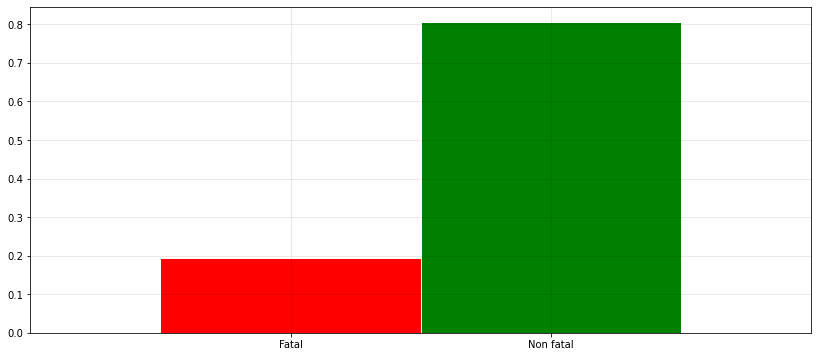

In [12]:
accident_severity = df_acc_lst5sm['accident_severity'].values.tolist()
#does not has any MVs

for i in range(0,len(accident_severity)):
    if accident_severity[i]==3:
        accident_severity[i]=1
    else:
        accident_severity[i]=0

plt.figure(figsize=(14,6))
N, bins, patches = plt.hist(accident_severity,bins=np.arange(100)-0.5,edgecolor='white',\
                           linewidth=1,density=True)
for i in range(0,1):
    patches[i].set_facecolor('red')
for i in range(1,2):    
    patches[i].set_facecolor('green')
plt.xlim(-1,2)
plt.grid(color='black',alpha=0.1)
plt.xticks(ticks=(0,1),labels=('Fatal','Non fatal'))
plt.show()

HTML("""<style>.output_png{display: table-cell;text-align: center;vertical-align: middle;}</style>""")

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed egestas erat ac ante luctus, in porta elit auctor. Phasellus diam enim, ullamcorper dignissim metus eu, molestie vehicula tellus. Mauris faucibus a dui quis laoreet. Praesent et orci quis leo mollis ornare nec vel ante. Integer porttitor et sem nec ultrices. Quisque eleifend pellentesque magna, in lobortis nunc tempor gravida. Sed ac libero eu sapien pretium finibus sit amet at erat. Nunc auctor eget est vel cursus. In at sodales turpis.

Which are the **manoeuvres** that most conduct to accidents?
To answer that, the first thing to do is remove the rows where there are values equal to -1 (MVs) or to 99 (not specified manouvre).

In [13]:
vehicle_manoeuvre = df_vei_lst5sm['vehicle_manoeuvre'].values.tolist()
len_before = len(vehicle_manoeuvre)

print(vehicle_manoeuvre.count(-1))
print(vehicle_manoeuvre.count(99))

2238
39754


In [14]:
vehicle_manoeuvre = [x for x in vehicle_manoeuvre if x != -1]
vehicle_manoeuvre = [x for x in vehicle_manoeuvre if x != 99]
print('After the cleaning of the MV & useless data, the array is the',\
      100*(len(vehicle_manoeuvre)/len_before),'% of the original array')

After the cleaning of the MV & useless data, the array is the 96.18805890752556 % of the original array


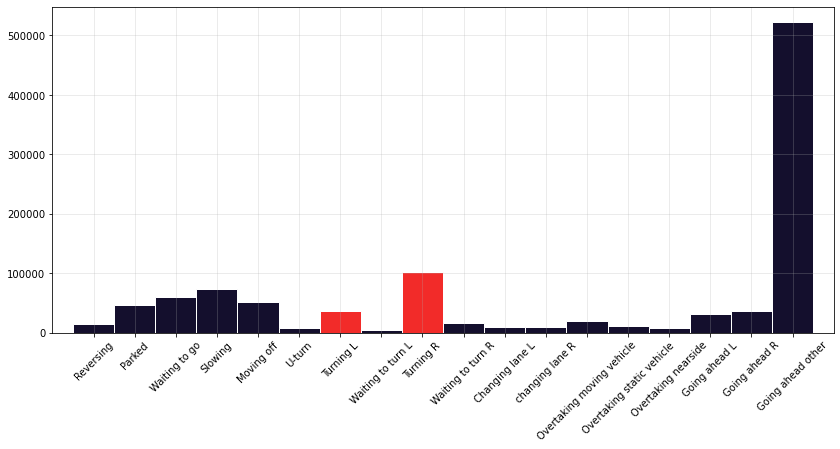

In [15]:
manoeuvres = ('Reversing','Parked','Waiting to go','Slowing','Moving off','U-turn',\
            'Turning L','Waiting to turn L','Turning R','Waiting to turn R',\
            'Changing lane L','changing lane R','Overtaking moving vehicle',\
            'Overtaking static vehicle','Overtaking nearside','Going ahead L',\
            'Going ahead R','Going ahead other')
plt.figure(figsize=(14,6))
#plt.hist(vehicle_manoeuvre,bins=np.arange(50)-0.5,color='violet',edgecolor='black')
N, bins, patches = plt.hist(vehicle_manoeuvre,bins=np.arange(50)-0.5,color='#140f2d',edgecolor='white')
for i in range(7,8):
    patches[i].set_facecolor('#f22b29')
for i in range(9,10):
    patches[i].set_facecolor('#f22b29')
plt.xlim(0,19)
plt.grid(alpha=0.3)
plt.xticks(ticks=range(1,19,1),labels=manoeuvres,rotation='45')
plt.show()

HTML("""<style>.output_png{display: table-cell;text-align: center;vertical-align: middle;}</style>""")

Why are there more accidents caused by a right turn than those caused by a left turn?

![Highway_in_UK](https://upload.wikimedia.org/wikipedia/commons/2/24/A2_at_Leyton_Cross_-_geograph.org.uk_-_203101.jpg)

...it was predictable, given the direction of travel used in the UK. A first (and very simple) test can be the study of a similar dataset coming from a state in which the drive is "on the left side of the road".
<br>

The Maryland has a similar dataset (https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes/65du-s3qu), uploaded each year. With lines of code similar to those used so far, it is therefore easy to graph the number of accidents caused by right or left turns in the United Kingdom and in Maryland:

In [23]:
df_maryland_acc_lst5_url = 'https://opendata.maryland.gov/api/views/65du-s3qu/rows.csv'
df_maryland_vei_lst5_url = 'https://opendata.maryland.gov/api/views/mhft-5t5y/rows.csv'
df_maryland_cas_lst5_url = 'https://opendata.maryland.gov/api/views/py4c-dicf/rows.csv'

df_maryland_vei_lst5 = pd.read_csv(df_maryland_vei_lst5_url,low_memory=False)
vehicle_manoeuvre_mary = df_maryland_vei_lst5['MOVEMENT_DESC'].values.tolist()
vehicle_manoeuvre_mary.count('Making Left Turn')

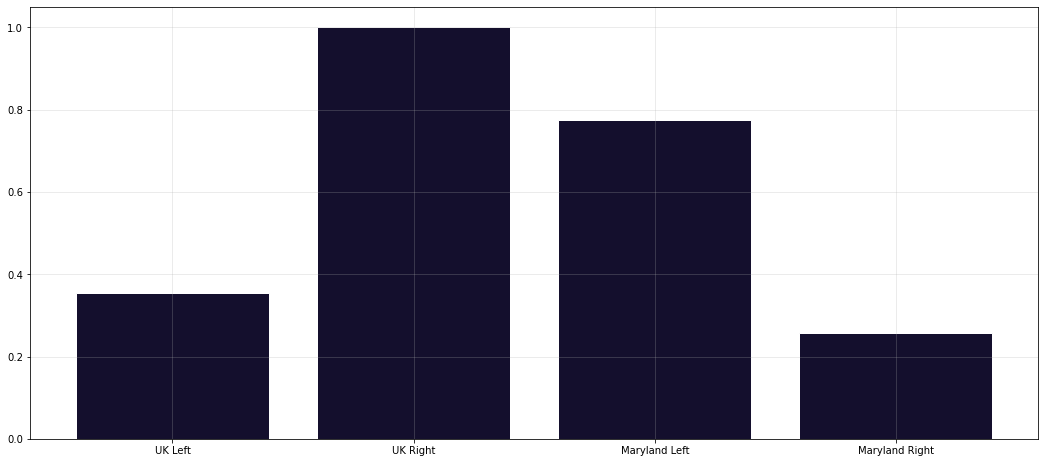

In [37]:
vehicle_manoeuvre_MarVSUK = [vehicle_manoeuvre.count(7),vehicle_manoeuvre.count(9),\
                      vehicle_manoeuvre_mary.count('Making Left Turn'),\
                      vehicle_manoeuvre_mary.count('Making Right Turn')] #7 is turn L, 9 is turn R in the UK's dataset
vehicle_manoeuvre_MarVSUK = veh_manour_MarVSUK/np.amax(veh_manour_MarVSUK)
ax = plt.figure(figsize=(14,6)).add_axes([0,0,1,1])
ax.bar(['UK Left','UK Right','Maryland Left','Maryland Right'],vehicle_manoeuvre_MarVSUK,color='#140f2d',edgecolor='white')
plt.grid(alpha=0.3)
plt.show()
HTML("""<style>.output_png{display: table-cell;text-align: center;vertical-align: middle;}</style>""")

Can be also interesting analyze which **kind of vehicles** are the most involved. To simplify the comprension of the graph, we rescaled all the different types on the dataset in 6 main groups:
- Bicycle
- Motorcycle
- Car
- Bus
- Other
- Cargo Vehicle

In [17]:
vehicle_type = df_vei_lst5sm['vehicle_type'].values.tolist()
len_before = len(vehicle_type)

In [18]:
vehicle_type = [x for x in vehicle_type if x != -1]
vehicle_type = [x for x in vehicle_type if x != 99]
print('After the cleaning of the MV & useless data, the array is the',\
      100*(len(vehicle_type)/len_before),'% of the original array')

After the cleaning of the MV & useless data, the array is the 99.889341870077 % of the original array


In [19]:
for i in range(0,len(vehicle_type)):
    if vehicle_type[i]==3 or vehicle_type[i]==4 or vehicle_type[i]==5 or vehicle_type[i]==97 or\
    vehicle_type[i]==22 or vehicle_type[i]==23:
        vehicle_type[i]=2
    elif vehicle_type[i]==98 or vehicle_type[i]==21 or vehicle_type[i]==19:
        vehicle_type[i]=20
    elif vehicle_type[i]==90 or vehicle_type[i]==18 or vehicle_type[i]==17:
        vehicle_type[i]=16
    elif vehicle_type[i]==11:
        vehicle_type[i]=10
    elif vehicle_type[i]==9:
        vehicle_type[i]=8
vehicle_typenew = vehicle_type.copy()
#print(np.unique(vehicle_typenew))
for j in range(0,len(vehicle_typenew)):
    if vehicle_typenew[j]==8:
        vehicle_typenew[j]=3
    elif vehicle_typenew[j]==10:
        vehicle_typenew[j]=4
    elif vehicle_typenew[j]==16:
        vehicle_typenew[j]=5
    elif vehicle_typenew[j]==20:
        vehicle_typenew[j]=6
#print(np.unique(vehicle_typenew))

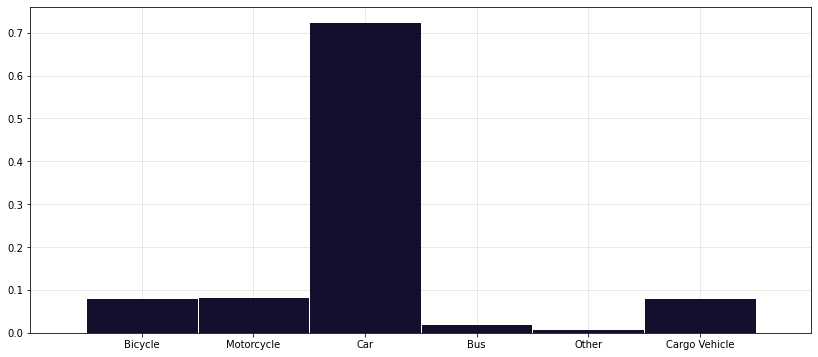

In [20]:
types = ('Bicycle','Motorcycle','Car','Bus','Other','Cargo Vehicle')
plt.figure(figsize=(14,6))
plt.hist(vehicle_typenew,bins=np.arange(100)-0.5,color='#140f2d',edgecolor='white',density=True)
plt.xlim(0,7)
plt.grid(color='black',alpha=0.1)
plt.xticks(ticks=(1,2,3,4,5,6),labels=types)
plt.show()

HTML("""<style>.output_png{display: table-cell;text-align: center;vertical-align: middle;}</style>""")

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed egestas erat ac ante luctus, in porta elit auctor. Phasellus diam enim, ullamcorper dignissim metus eu, molestie vehicula tellus. Mauris faucibus a dui quis laoreet. Praesent et orci quis leo mollis ornare nec vel ante. Integer porttitor et sem nec ultrices. Quisque eleifend pellentesque magna, in lobortis nunc tempor gravida. Sed ac libero eu sapien pretium finibus sit amet at erat. Nunc auctor eget est vel cursus. In at sodales turpis.

It's now time to analyze the pedestrians (the 6th point of the list about our general analysis).

In [21]:
pedestrian_location = df_cas_lst5sm['pedestrian_location'].values.tolist()
len_before = len(pedestrian_location)
pedestrian_location = [x for x in pedestrian_location if x != -1]
pedestrian_location = [x for x in pedestrian_location if x != 0]
pedestrian_location = [x for x in pedestrian_location if x != 99]
print('After the cleaning of the MV & useless data, the array is the',\
      100*(len(pedestrian_location)/len_before),'% of the original array')

After the cleaning of the MV & useless data, the array is the 13.597905121553097 % of the original array


Dobbiamo scrivere che tipo okkk solo 13 ma perchè negli altri non ce ne sono

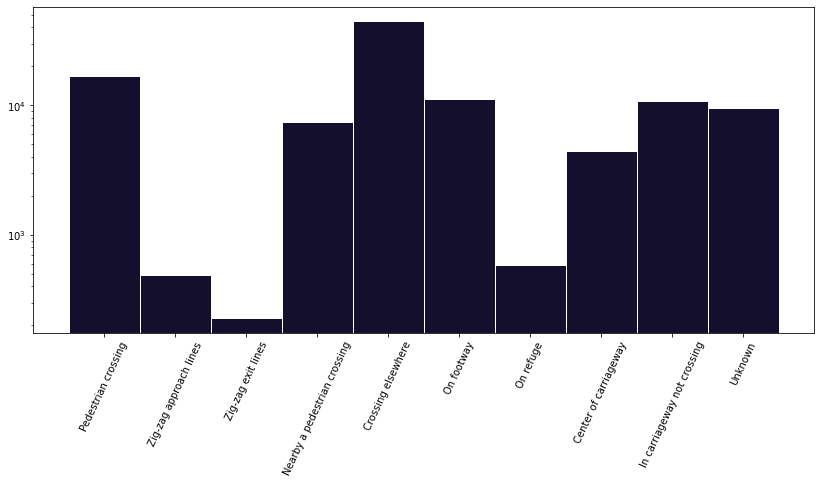

In [22]:
locations=('Pedestrian crossing','Zig-zag approach lines','Zig-zag exit lines'\
           ,'Nearby a pedestrian crossing'\
           ,'Crossing elsewhere','On footway','On refuge','Center of carriageway',\
           'In carriageway not crossing','Unknown')
plt.figure(figsize=(14,6))
plt.hist(pedestrian_location,bins=np.arange(20)-0.5,color='#140f2d',edgecolor='white')
plt.yscale('log')
plt.xticks(ticks=range(1,11,1),labels=locations,rotation=65)
plt.xlim(0,11)
plt.show()

HTML("""<style>.output_png{display: table-cell;text-align: center;vertical-align: middle;}</style>""")